# Pittsburgh Police Arrest Data

![Police GIF](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExbzVsOTdxY29rbHgwbnZqcGpwZXNmdjMzcm8xYXczcWtmN2M4bXczbCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/RYjnzPS8u0jAs/giphy.gif)

In [1]:
# import pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# adjust display settings to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# read in the data
policeData = pd.read_csv("e03a89dd-134a-4ee8-a2bd-62c40aeebc6f.csv")

In [4]:
# display first 5 entries
policeData.head(5)
# the arrest data starts from 2016, so it's fairly recent (last 8 years)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


### Here is some extra information about each category:
ARREST_ID: Unique identifier for each arrest incident

CCR: Incident Number

ZONE: Police Zone where Incident occurred

In [6]:
# display 5 entries at random to get a glimpse of the data
policeData.sample(5)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
11441,11442,1988940,17146310,44.0,F,B,2017-08-03T21:40:00,"Forbes AV & Stevenson ST Pittsburgh, PA 15219",9501 Bench Warrant,"Forbes AV & Stevenson ST Pittsburgh, PA 15219",Bluff,2,103.0,6.0,3.0,-79.986533,40.437731
33414,37271,2017133,19152325,36.0,M,B,2019-08-02T11:45:00,"E North AV & Cedar AV Pittsburgh, PA 15212",13(a)(16) Possession of Controlled Substance /...,"E North AV & Cedar AV Pittsburgh, PA 15212",Allegheny Center,1,2204.0,1.0,1.0,-80.002625,40.456227
2133,2134,1977185,16197966,44.0,M,H,2016-10-20T01:35:00,"300 Block N Negley AV Pittsburgh, PA 15206",3503.B1I DEF. TRESPASS ACTUAL COMMUNICATION,"300 Block N Negley AV Pittsburgh, PA 15206",East Liberty,5,1115.0,9.0,2.0,-79.929036,40.465758
53095,68850,2044350,21228937,41.0,M,B,2021-12-24T23:15:00,"2500 Block West Liberty AV Pittsburgh, PA 15226",2701 Simple Assault. / 1543 Driving While Oper...,"2500 Block West Liberty AV Pittsburgh, PA 15226",Beechview,6,1920.0,4.0,5.0,-80.025497,40.399193
15714,15715,1994322,17235783,27.0,M,B,2017-12-07T14:20:00,"Brighton RD & Highwood ST Pittsburgh, PA 15212",3929 Retail Theft. / 13(a)(32) Paraphernalia -...,"1100 Block Highwood ST Pittsburgh, PA 15212",Marshall-Shadeland,1,2715.0,1.0,1.0,-80.025256,40.468392


In [7]:
relevant_columns = ['INCIDENTNEIGHBORHOOD']
policeData = policeData[relevant_columns]

In [12]:
neighborhood_counts = policeData['INCIDENTNEIGHBORHOOD'].value_counts(ascending=True)

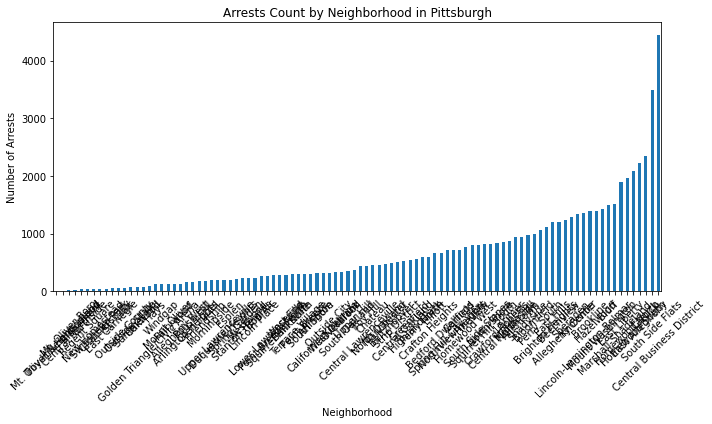

In [13]:
# plotting the data using a bar chart
plt.figure(figsize=(10, 6))
neighborhood_counts.plot(kind='bar')
plt.title('Arrests Count by Neighborhood in Pittsburgh')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# displaying a table with neighborhoods from most arrests to least arrests
neighborhood_counts_table = neighborhood_counts.reset_index()
neighborhood_counts_table.columns = ['Neighborhood', 'Number of Arrests']
print("\nNeighborhoods by Arrest Count (Least to Most):")
print(neighborhood_counts_table)


Neighborhoods by Arrest Count (Least to Most):
                   Neighborhood  Number of Arrests
0       Mt. Oliver Neighborhood                  2
1        Troy Hill-Herrs Island                  6
2               Mt. Oliver Boro                 18
3             Central Northside                 23
4                     Ridgemont                 37
5                 Regent Square                 37
6                 New Homestead                 39
7                Swisshelm Park                 43
8                Chartiers City                 46
9                 East Carnegie                 48
10                    St. Clair                 55
11               Outside County                 57
12                Outside State                 67
13                  Summer Hill                 76
14                      Oakwood                 82
15  Golden Triangle/Civic Arena                 83
16                         Hays                120
17                      Windgap   